# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

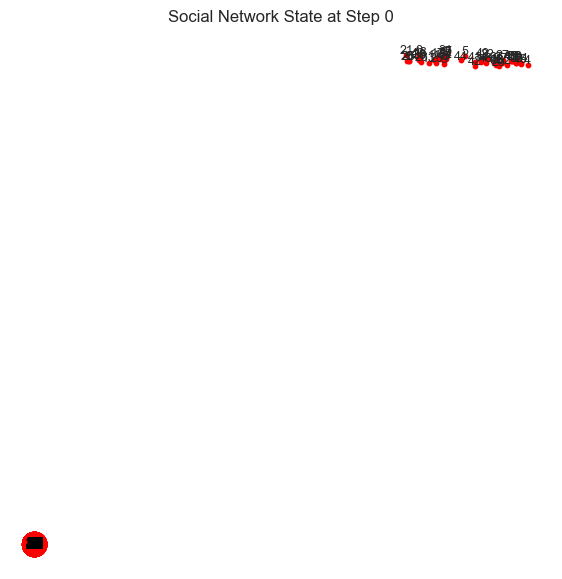

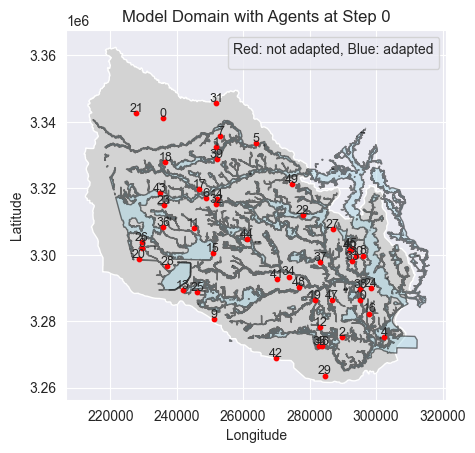

<Figure size 1000x600 with 0 Axes>

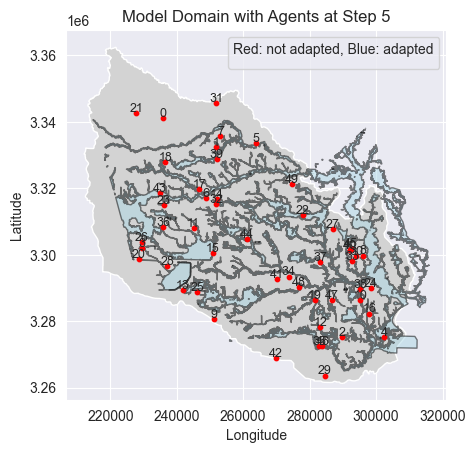

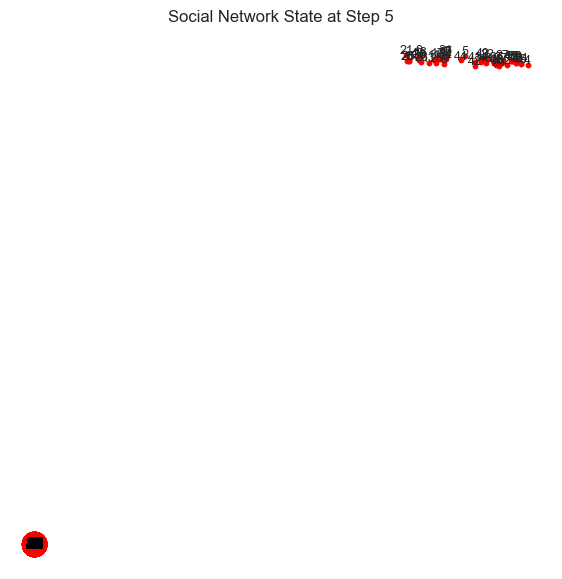

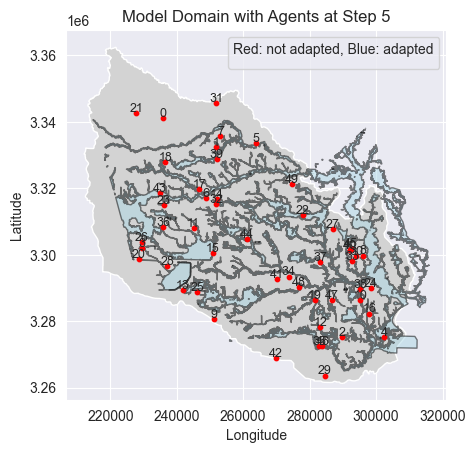

<Figure size 1000x600 with 0 Axes>

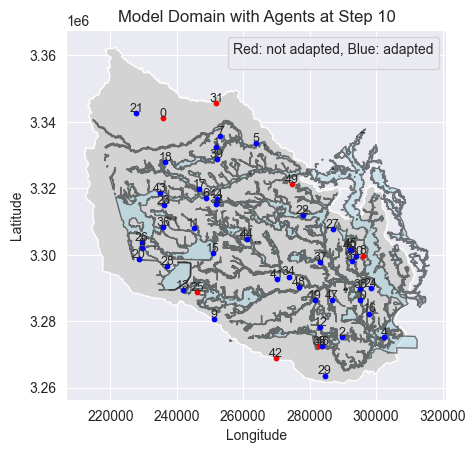

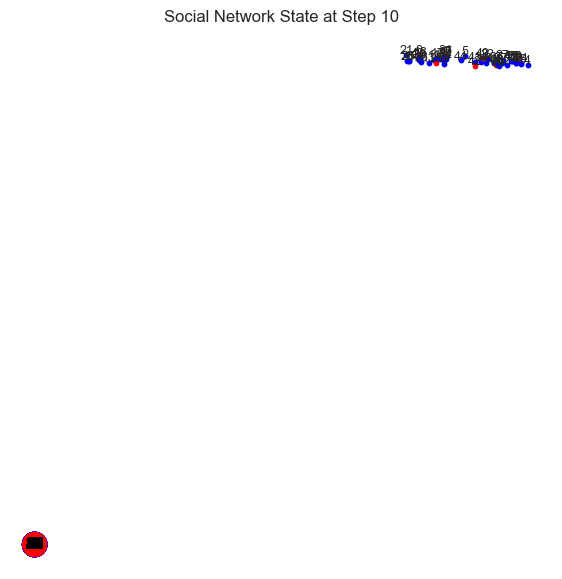

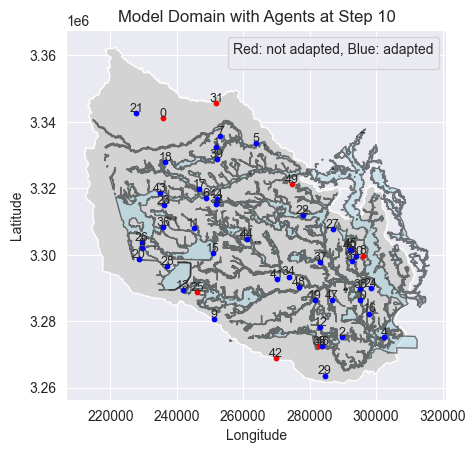

<Figure size 1000x600 with 0 Axes>

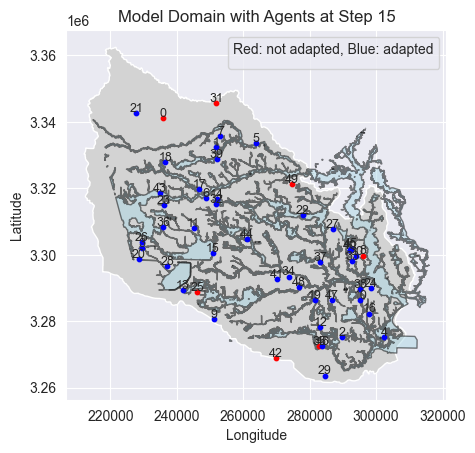

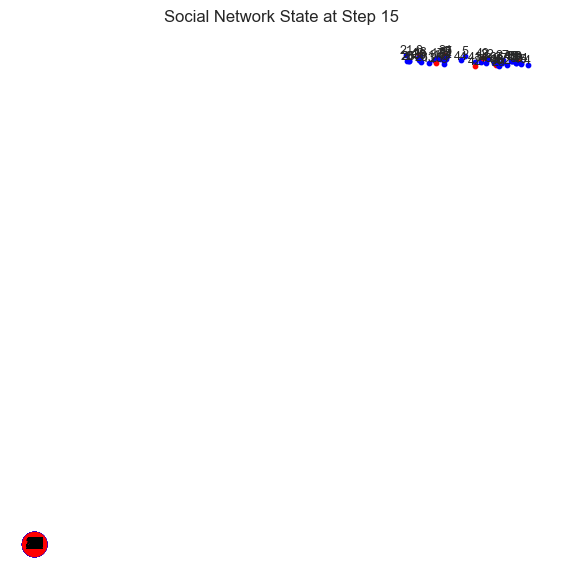

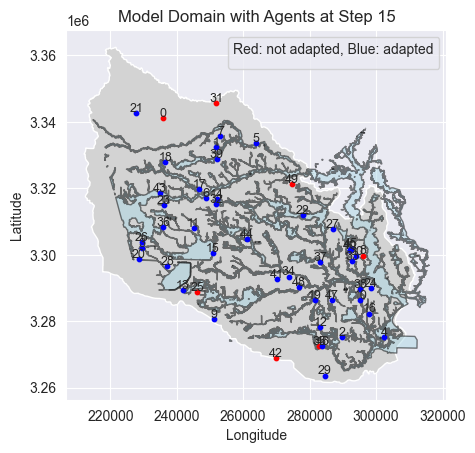

<Figure size 1000x600 with 0 Axes>

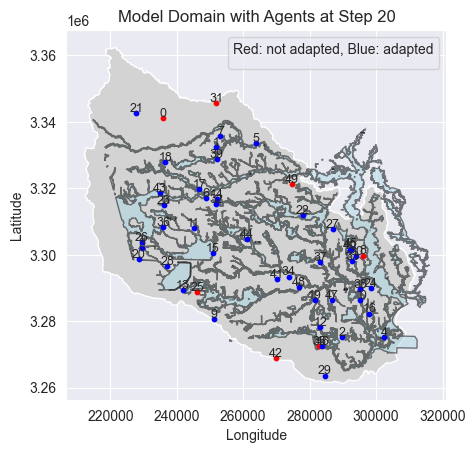

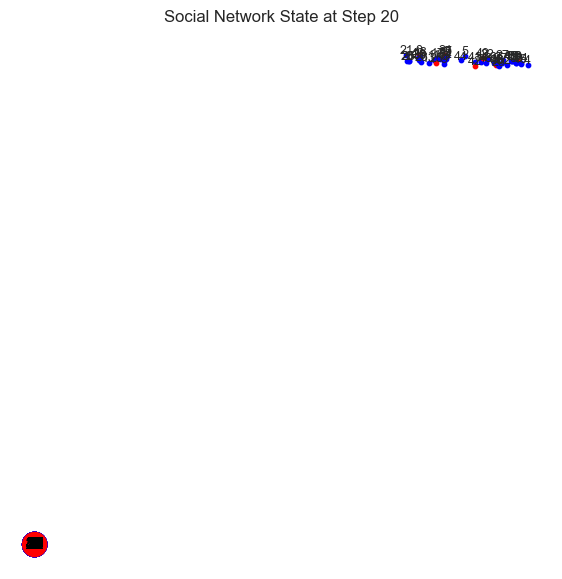

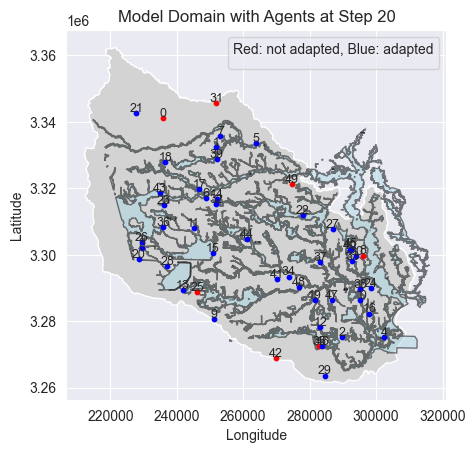

In [18]:
import mesa
import pandas as pd
from agents import Households, Government
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    households_agents = [agent for agent in model.schedule.agents if isinstance(agent, Households)]
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in households_agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    for agent in households_agents:
           ax.scatter(agent.location.x, agent.location.y, color=colors[agent.unique_id], s=10)
           ax.annotate(str(agent.unique_id), (agent.location.x, agent.location.y), textcoords="offset points", xytext=(0,1), ha='center', fontsize=9)
        
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
    model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents() 

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [19]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data


FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.000000              0.000000          0.000000   
     1                   0.462486              0.513659          0.000000   
     2                   0.606974              0.561128          0.000000   
     3                   0.371849              0.475574          0.000000   
     4                   1.850586              0.755767          0.000000   
...                           ...                   ...               ...   
19   45                  0.472407              0.517365          0.330971   
     46                  0.244786              0.402573          0.180914   
     47                  0.443270              0.506249          0.496320   
     48                  0.751734              0.598474          0.804195   
     49                  0.000000              0.000000          0.000000   

              FloodDamageActual  IsAdapted  IsEligible  Takesloan  Takesgrant  \
Step AgentID                                                                    
0    0                 0.000000      False       False      False       False   
     1                 0.000000      False       False      False       False   
     2                 0.000000      False       False      False       False   
     3                 0.000000      False       False      False       False   
     4                 0.000000      False       False      False       False   
...                         ...        ...         ...        ...         ...   
19   45                0.455241       True        True       True       False   
     46                0.349780       True        True       True       False   
     47                0.525987       True        True       True       False   
     48                0.610252       True        True       True       False   
     49                0.000000      False       False      False       False   

              FriendsCount                                       location  \
Step AgentID                                                                
0    0                   3   POINT (235855.78283571464 3341142.110109264)   
     1                   4   POINT (251694.6476188498 3332348.8849694873)   
     2                   4   POINT (289651.2045347477 3275170.5667691194)   
     3                   5  POINT (229549.95001004232 3302153.3337369235)   
     4                   3  POINT (302424.71582109324 3275155.0139405797)   
...                    ...                                            ...   
19   45                  4   POINT (292428.42575874797 3301880.709700972)   
     46                  4    POINT (283830.8682621796 3272502.188909399)   
     47                  8  POINT (286656.87452121667 3286257.8597264006)   
     48                  4   POINT (276776.34628231893 3290303.990274235)   
     49                  4   POINT (274636.2267750838 3321371.0455112457)   

              AdaptedFriendsCount  Rank  
Step AgentID                             
0    0                          0     0  
     1                          0     0  
     2                          0     0  
     3                          0     0  
     4                          0     0  
...                           ...   ...  
19   45                         4    33  
     46                         4    42  
     47                         7    22  
     48                         4    15  
     49                         4    50  

[1000 rows x 12 columns]

In [20]:
sum_result = agent_data.iloc[351:400].loc[(agent_data['Rank'] < 7), 'FloodDamageActual'].sum()

print(f"Sum of 'FloodDamageActual' for Rank under 10: {sum_result}")


Sum of 'FloodDamageActual' for Rank under 10: 5.128785584050717


In [21]:
sum_result = agent_data.iloc[351:400].loc[(agent_data['Rank'] < 10), 'FloodDamageEstimated'].sum()

print(f"Sum of 'FloodDamageEstimated' for Rank under 10: {sum_result}")

Sum of 'FloodDamageEstimated' for Rank under 10: 7.492490508467446


In [22]:
sum_result = agent_data.iloc[351:400]['FloodDamageEstimated'].sum()

print(f"Sum of 'FloodDamageEstimated' for rows 351 to 400: {sum_result}")


Sum of 'FloodDamageEstimated' for rows 351 to 400: 25.945146345890674


In [23]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households,total_eligible_households,total_loanstaken_households,total_flooddamage_households,total_grantstaken_households
0,0,0,0,0.000000,0
1,0,0,0,0.000000,0
2,0,0,0,0.000000,0
3,0,0,0,0.000000,0
4,0,0,0,0.000000,0
5,0,0,0,24.616672,0
6,0,43,0,24.616672,0
7,34,43,28,24.616672,10
8,43,43,43,24.616672,10
9,43,43,43,24.616672,10


In [24]:
if model.government.gives_grant is not None:
    print(model.government.gives_grant)
else:
    print("Value is None or evaluates to False.")

True


In [25]:
params = dict(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz",loan_threshold_agent=range(10,31,1))

#Paramameters can be added to the params section to change them in the batchrunner.
#minimum_damage_loan_eligibility_factor_agent=np.arange(0,1,.1) 
#base_probability_agent=range(1,50,2)
#minimum_damage_loan_eligibility_factor_agent=np.arange(0,1,.1).round(1)
#friends_probability_factor_agent= range(1,20,1), 
#base_probability_agent=range(1,50,1))
#loan_threshold_agent=range(10,31,1)) 
#grant_threshold_agent=range(15,31,1)) 
              
results = mesa.batch_run(
    AdaptationModel,
    parameters=params,
    iterations=200,
    max_steps=20,
    number_processes=1,  # you can set this higher based on the number of processor cores you have
    data_collection_period=1,
    display_progress=True)

  0%|          | 0/4200 [00:00<?, ?it/s]

In [26]:
results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'number_of_households',
       'flood_map_choice', 'network', 'loan_threshold_agent',
       'total_adapted_households', 'total_eligible_households',
       'total_loanstaken_households', 'total_flooddamage_households',
       'total_grantstaken_households', 'AgentID', 'FloodDepthEstimated',
       'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual',
       'IsAdapted', 'IsEligible', 'Takesloan', 'Takesgrant', 'FriendsCount',
       'location', 'AdaptedFriendsCount', 'Rank'],
      dtype='object')


In [27]:
print(pd.DataFrame(results))

         RunId  iteration  Step  number_of_households flood_map_choice  \
0            0          0     0                    50           harvey   
1            0          0     0                    50           harvey   
2            0          0     0                    50           harvey   
3            0          0     0                    50           harvey   
4            0          0     0                    50           harvey   
...        ...        ...   ...                   ...              ...   
4409995   4199        199    20                    50           harvey   
4409996   4199        199    20                    50           harvey   
4409997   4199        199    20                    50           harvey   
4409998   4199        199    20                    50           harvey   
4409999   4199        199    20                    50           harvey   

                network  loan_threshold_agent  total_adapted_households  \
0        watts_strogatz             

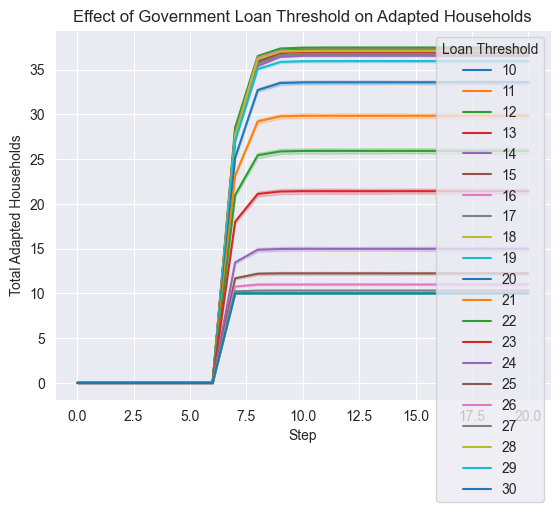

In [28]:
# Create a lineplot with error bars
g = sns.lineplot(
    data=results_df,
    x="Step",
    y="total_adapted_households",
    hue="loan_threshold_agent",
    palette="tab10"
)

plot_title = "Effect of Government Loan Threshold on Adapted Households"
g.set(title=plot_title, ylabel="Total Adapted Households");
legend = g.legend_
legend.set_title("Loan Threshold")

In [29]:
# Your existing code for the line plot
#g = sns.lineplot(
#    data=results_df,
#    x="base_probability_agent",
#    y="total_adapted_households"
#)

# Set the title and labels
#plot_title = "Effect of Base Probability on Adaptation"
#g.set(title=plot_title, ylabel="Total Adapted Households")

# Adding the trendline
#sns.regplot(
#    data=results_df,
#    x="base_probability_agent",
#    y="total_adapted_households",
#    scatter=False,  # Avoid re-plotting the data points
#    color="black",  # Trendline color, you can choose as needed
#    ax=g  # Ensures that the regression line is plotted on the existing axes and not on a new figure
#)

#g.set_xlabel("Base Probability Agent")
#g.set_ylabel("Total Adapted Households")

#plt.show()